In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df=pd.read_csv("EV_WORLD.csv")
df=df.drop(['category','parameter','mode','unit'], axis=1)
df.head(25)
# Create separate datasets for PHEV and BEV
df = df[df['powertrain'] == 'BEV']
df=df.drop(['region','powertrain'],axis=1)
df
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['value']])
# Prepare the data for XGBoost
lookback = 3  # Number of previous time steps to consider
X, y = [], []
for i in range(len(df) - lookback):
    X.append(scaled_data[i:i+lookback])
    y.append(scaled_data[i+lookback])
X, y = np.array(X), np.array(y)

# Build the XGBoost model
model = XGBRegressor()
model.fit(X.reshape(X.shape[0], -1), y.ravel())

# Make predictions on the entire time series
y_pred = model.predict(X.reshape(X.shape[0], -1))
# Inverse scale the predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_actual_inv = scaler.inverse_transform(y.reshape(-1, 1))


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_actual_inv, y_pred_inv))
print('RMSE:', rmse)

RMSE: 6231.663596918262


In [15]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['value']])

# Prepare the data for LSTM
lookback = 3  # Number of previous time steps to consider
X, y = [], []
for i in range(len(df) - lookback):
    X.append(scaled_data[i:i+lookback])
    y.append(scaled_data[i+lookback])
X, y = np.array(X), np.array(y)

# Build the LSTM model with regularization and dropout
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(lookback, 1), kernel_regularizer=l2(0.001)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X, y, epochs=250, batch_size=1, verbose=2, callbacks=[early_stopping])

# Make predictions on the entire time series
y_pred = model.predict(X)
# Inverse scale the predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_actual_inv = scaler.inverse_transform(y)

Epoch 1/250
10/10 - 2s - loss: 0.1622 - 2s/epoch - 169ms/step
Epoch 2/250
10/10 - 0s - loss: 0.1512 - 30ms/epoch - 3ms/step
Epoch 3/250
10/10 - 0s - loss: 0.1397 - 33ms/epoch - 3ms/step
Epoch 4/250
10/10 - 0s - loss: 0.1289 - 44ms/epoch - 4ms/step
Epoch 5/250
10/10 - 0s - loss: 0.1232 - 32ms/epoch - 3ms/step
Epoch 6/250
10/10 - 0s - loss: 0.1100 - 36ms/epoch - 4ms/step
Epoch 7/250
10/10 - 0s - loss: 0.1018 - 35ms/epoch - 3ms/step
Epoch 8/250
10/10 - 0s - loss: 0.0953 - 35ms/epoch - 4ms/step
Epoch 9/250
10/10 - 0s - loss: 0.0889 - 30ms/epoch - 3ms/step
Epoch 10/250
10/10 - 0s - loss: 0.0824 - 31ms/epoch - 3ms/step
Epoch 11/250
10/10 - 0s - loss: 0.0785 - 28ms/epoch - 3ms/step
Epoch 12/250
10/10 - 0s - loss: 0.0728 - 30ms/epoch - 3ms/step
Epoch 13/250
10/10 - 0s - loss: 0.0697 - 31ms/epoch - 3ms/step
Epoch 14/250
10/10 - 0s - loss: 0.0658 - 32ms/epoch - 3ms/step
Epoch 15/250
10/10 - 0s - loss: 0.0635 - 33ms/epoch - 3ms/step
Epoch 16/250
10/10 - 0s - loss: 0.0593 - 33ms/epoch - 3ms/step
E

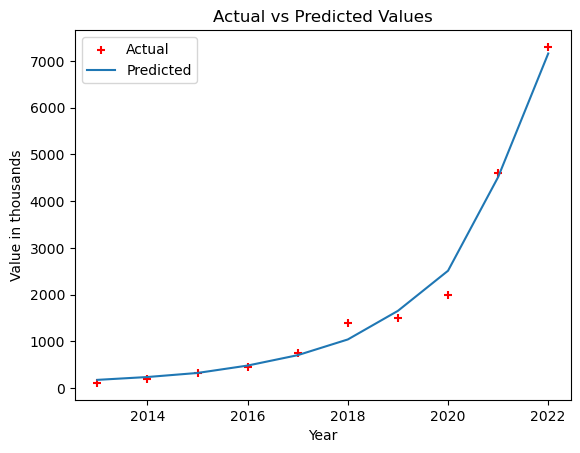

RMSE: 212045.78915968185
R2: 0.00921558247654719


In [24]:
# Plot the actual and predicted values
plt.scatter(df['year'][lookback:], y_actual_inv/1000,color='red',marker='+', label='Actual')
plt.plot(df['year'][lookback:], y_pred_inv/1000, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Value in thousands')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_actual_inv, y_pred_inv))
print('RMSE:', rmse)
from sklearn.metrics import r2_score

r2 = r2_score(y_actual_inv, y_pred_inv)
print('R2:', 1-r2)


In [21]:

y_pred_inv

array([[175379.250000],
       [236376.406250],
       [323235.781250],
       [481566.593750],
       [703933.750000],
       [1040177.562500],
       [1652473.125000],
       [2510458.000000],
       [4514949.500000],
       [7159071.000000]], dtype=float32)

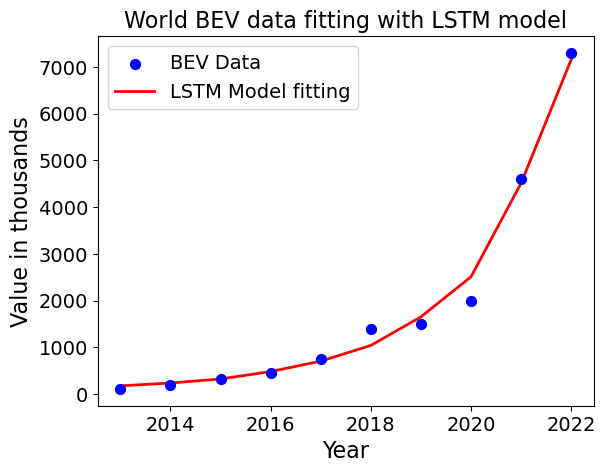

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df=pd.read_csv("EV_WORLD.csv")
df=df.drop(['category','parameter','mode','unit'], axis=1)
df.head(25)
# Create separate datasets for PHEV and BEV

df = df[df['powertrain'] == 'BEV']
df=df.drop(['region','powertrain'],axis=1)
df

lstm = np.array([[ 175379.25],[ 236376.4 ],[ 323235.78],[ 481566.6 ],[ 703933.75],[1040177.56],[1652473.1 ],[2510458.  ],[4514949.5 ],[7159071.  ]])
actual_values = df['value'].values[-len(lstm):]
 


# Plot the actual and predicted values
plt.scatter(df['year'][3:], df['value'][3:]/1000,color='blue',marker='o', s=50, zorder=10,label='BEV Data')
plt.plot(df['year'][3:],lstm/ 1000,color='red',linewidth=2, label='LSTM Model fitting')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value in thousands', fontsize=16)
plt.title('World BEV data fitting with LSTM model', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
#rmse 210,000
#r2 0.001